In [11]:
import pandas as pd
import seaborn as sns

In [12]:
# Load the dataset
home_data = pd.read_csv('housing.csv', usecols = ['longitude','latitude','median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

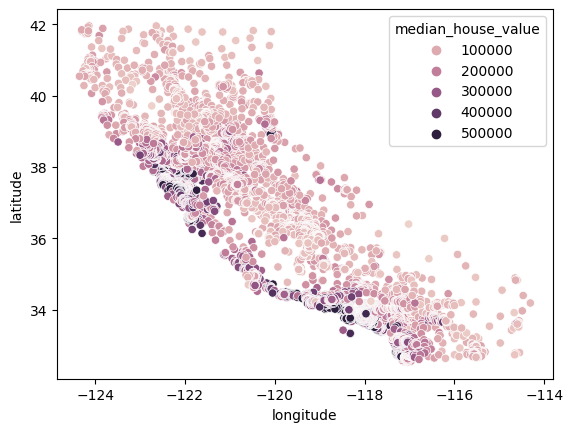

In [13]:
# Create a scatterplot using Seaborn to visualize data
sns.scatterplot(data = home_data, x ='longitude', y = 'latitude', hue = 'median_house_value')

In [14]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(home_data[['latitude','longitude']], home_data[['median_house_value']], test_size = 0.33, random_state = 0)

In [15]:
# Normalize the data
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [16]:
from sklearn.cluster import KMeans

# Create a K-Means clustering model
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init = 'auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=4, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

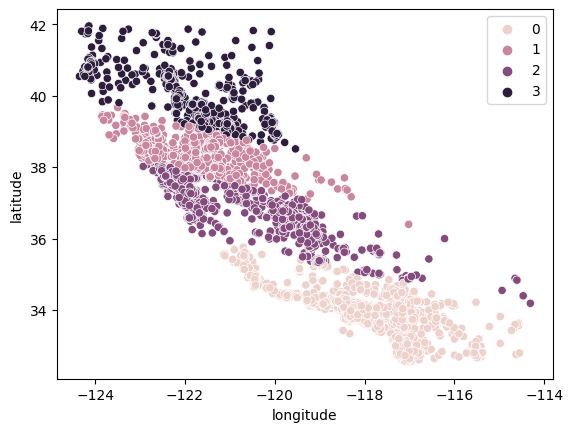

In [17]:
# Create a scatterplot using Seaborn to visualize data
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [20]:
from sklearn.metrics import silhouette_score

# Create a dictionary to store Silhouette Scores for different k values
sil = {}
sil_test = {}

# Range of k values to consider
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init='auto')
    kmeans.fit(X_train_norm)

    # Get cluster labels for the test set (X_test_norm)
    labels_test = kmeans.predict(X_test_norm)

    sil[k] = silhouette_score(X_train_norm, kmeans.labels_, metric = 'euclidean')
    sil_test[k] = silhouette_score(X_test_norm, labels_test, metric = 'euclidean')

    print("Silhouette Score for k on training set =", k, "is", sil[k])
    print("Silhouette Score for k on test set =", k, "is", sil_test[k])
    print("")

# Find the k with the maximum Silhouette Score
best_k = max(sil_test, key = sil_test.get)

Silhouette Score for k on training set = 2 is 0.7754128527515257
Silhouette Score for k on test set = 2 is 0.7776196984499572

Silhouette Score for k on training set = 3 is 0.7499371920703546
Silhouette Score for k on test set = 3 is 0.7499365840241177

Silhouette Score for k on training set = 4 is 0.6977084899900465
Silhouette Score for k on test set = 4 is 0.7036407861820894

Silhouette Score for k on training set = 5 is 0.6404445378227861
Silhouette Score for k on test set = 5 is 0.6456213561972798

Silhouette Score for k on training set = 6 is 0.6641273887010468
Silhouette Score for k on test set = 6 is 0.6669919815815049

Silhouette Score for k on training set = 7 is 0.6411192392524833
Silhouette Score for k on test set = 7 is 0.6418748855800157



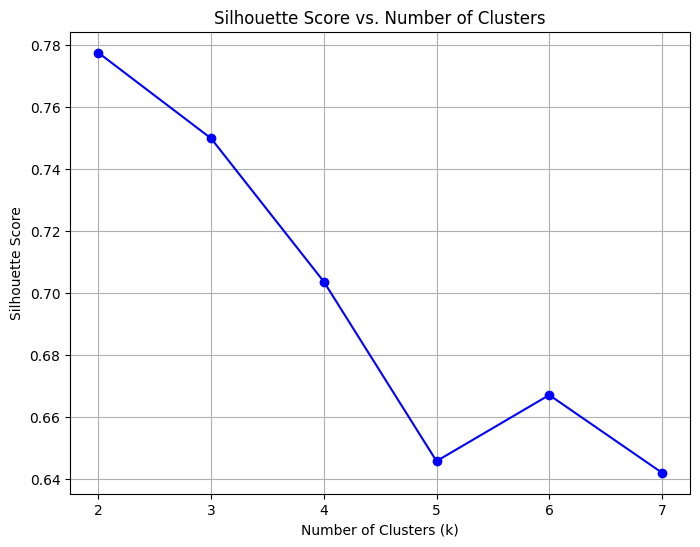

In [21]:
import matplotlib.pyplot as plt

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, [sil_test[k] for k in k_values], marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [23]:
print("Best k:", best_k)
print("Silhouette Score for best k:", sil_test[best_k])

Best k: 2
Silhouette Score for best k: 0.7776196984499572


<Axes: xlabel='longitude', ylabel='latitude'>

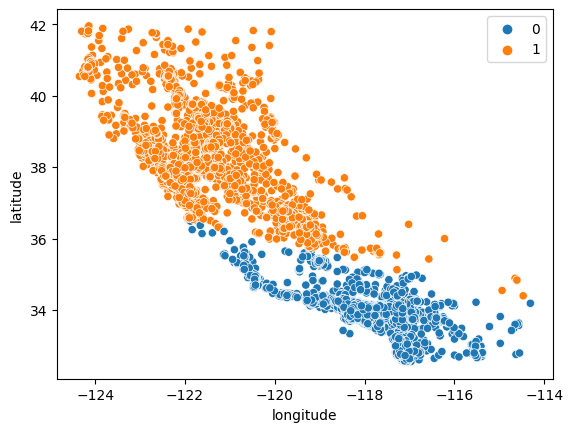

In [24]:
kmeans = KMeans(n_clusters = best_k, random_state = 0, n_init = 'auto')
kmeans.fit(X_train_norm)

sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

THANK YOU